# Predict if a customer will pay back a Loan in the next 3 Month

**Exemplary approach**:
- Data cleaning & EDA
- missing value handling 
- categorical reduction
- creating extra features (bining, scaling, etc)
- plotting evaluation scores

**Machine learning**: Supervised segmentation (classification)<br>
**Selected learners**: [random forest, SVC, xgboost, lightGBM, deep learning]<br>
**Evaluation metric**: Classification report , confusion matrix and f1 score

In [1]:
#import required libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data understanding & inspection

In [2]:
# load the training and testing data..
train=  pd.read_csv('datasets/Train.csv',  )
test=  pd.read_csv('datasets/Test.csv', )

In [3]:
# check for data quality

In [4]:
train.dtypes

ID                        object
Policy Start Date         object
Policy End Date           object
Gender                    object
Age                        int64
First Transaction Date    object
No_Pol                     int64
Car_Category              object
Subject_Car_Colour        object
Subject_Car_Make          object
LGA_Name                  object
State                     object
ProductName               object
target                     int64
dtype: object

In [5]:
train.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [6]:
# training & testing data
print('training set: ', train.shape)
print('testing set:', test.shape)

training set:  (12079, 14)
testing set: (1202, 13)


In [7]:
train.tail()

ID Policy Start Date Policy End Date  Gender  Age  \
12074  ID_ZZA1SES        2010-05-25      2011-05-24  Female   30   
12075  ID_ZZDAC3K        2010-10-03      2011-10-02  Female   59   
12076  ID_ZZIU2XC        2010-10-10      2011-10-08    Male   34   
12077  ID_ZZRQ1NF        2010-02-27      2011-02-26     NaN  120   
12078  ID_ZZWRIIE        2010-07-01      2011-06-30  Female   46   

      First Transaction Date  No_Pol Car_Category Subject_Car_Colour  \
12074             2010-05-25       1          NaN              Black   
12075             2010-10-03       1          NaN                NaN   
12076             2010-10-10       1          NaN                NaN   
12077             2010-02-27       2          NaN              White   
12078             2010-07-01       2         JEEP              Black   

      Subject_Car_Make         LGA_Name        State  ProductName  target  
12074      Range Rover      Ibeju/Lekki  Ibeju-Lekki  Car Classic       1  
12075              NaN              NaN          NaN  Car Classic       0  
12076              NaN              NaN          NaN      CarSafe       0  
12077           TOYOTA  Victoria Island        Lagos         CVTP       0  
12078       Land Rover     Lagos Island        Lagos  Car Classic       0

In [8]:
test.head()

ID Policy Start Date Policy End Date  Gender  Age  \
0  ID_01QM0NU        2010-10-23      2011-10-22  Female   46   
1  ID_024NJLZ        2010-10-14      2011-10-13    Male   32   
2  ID_02NOVWQ        2010-08-29      2011-08-28  Female   45   
3  ID_02VSP68        2010-06-13      2011-06-12  Female   58   
4  ID_02YB37K        2010-07-01      2011-06-30     NaN  120   

  First Transaction Date  No_Pol Car_Category Subject_Car_Colour  \
0             2010-10-23       1          NaN                NaN   
1             2010-10-14       1          NaN                NaN   
2             2010-08-29       2       Saloon              Black   
3             2010-06-13       1       Saloon                NaN   
4             2010-07-01       1       Saloon                Red   

  Subject_Car_Make         LGA_Name            State  ProductName  
0             Ford  Abuja Municipal  Abuja-Municipal  Car Classic  
1              NaN           Kosofe            Benue  Car Classic  
2            Honda          Wuse 11            Abuja  Car Classic  
3           TOYOTA              NaN              NaN      CarSafe  
4          Hyundai  Victoria Island            Lagos  Car Classic

In [9]:
# combine both the training and testing data 
# for proper cleaning and preprocessing.
all_data= pd.concat([train, test])

In [10]:
# inspect the comnbined data

In [11]:
all_data.shape

(13281, 14)

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 1201
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13281 non-null  object 
 1   Policy Start Date       13281 non-null  object 
 2   Policy End Date         13281 non-null  object 
 3   Gender                  12881 non-null  object 
 4   Age                     13281 non-null  int64  
 5   First Transaction Date  13281 non-null  object 
 6   No_Pol                  13281 non-null  int64  
 7   Car_Category            9171 non-null   object 
 8   Subject_Car_Colour      5622 non-null   object 
 9   Subject_Car_Make        10557 non-null  object 
 10  LGA_Name                6149 non-null   object 
 11  State                   6137 non-null   object 
 12  ProductName             13281 non-null  object 
 13  target                  12079 non-null  float64
dtypes: float64(1), int64(2), object(11)
mem

In [13]:
# percentage of missing data
all_data.isnull().sum()/all_data.shape[0]

ID                        0.000000
Policy Start Date         0.000000
Policy End Date           0.000000
Gender                    0.030118
Age                       0.000000
First Transaction Date    0.000000
No_Pol                    0.000000
Car_Category              0.309465
Subject_Car_Colour        0.576689
Subject_Car_Make          0.205105
LGA_Name                  0.537008
State                     0.537911
ProductName               0.000000
target                    0.090505
dtype: float64

<AxesSubplot:>

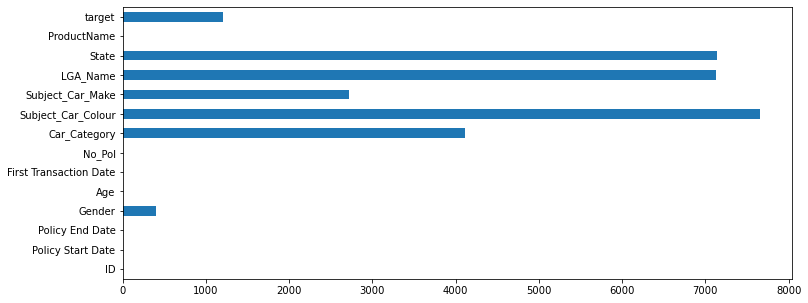

In [14]:
## Check for missing values

all_data.isnull().sum().plot(kind='barh', figsize=(12, 5))

In [15]:
all_data.head()

ID Policy Start Date Policy End Date  Gender  Age  \
0  ID_0040R73        2010-05-14      2011-05-13    Male   30   
1  ID_0046BNK        2010-11-29      2011-11-28  Female   79   
2  ID_005QMC3        2010-03-21      2011-03-20    Male   43   
3  ID_0079OHW        2010-08-21      2011-08-20    Male    2   
4  ID_00BRP63        2010-08-29      2010-12-31  Entity   20   

  First Transaction Date  No_Pol Car_Category Subject_Car_Colour  \
0             2010-05-14       1       Saloon              Black   
1             2010-11-29       1         JEEP               Grey   
2             2010-03-21       1       Saloon                Red   
3             2010-08-21       1          NaN                NaN   
4             2010-08-29       3          NaN                NaN   

  Subject_Car_Make LGA_Name  State  ProductName  target  
0           TOYOTA      NaN    NaN  Car Classic     0.0  
1           TOYOTA      NaN    NaN  Car Classic     1.0  
2           TOYOTA      NaN    NaN  Car Classic     0.0  
3              NaN      NaN    NaN      CarSafe     0.0  
4              NaN    Lagos  Lagos        Muuve     1.0

# Data preprocessing & cleaning

In [16]:
list(all_data.select_dtypes('object'))

['ID',
 'Policy Start Date',
 'Policy End Date',
 'Gender',
 'First Transaction Date',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [17]:
# set the datatype of these columns to datatime.
for col in ['Policy Start Date', 'Policy End Date','First Transaction Date']:
    all_data[col]= pd.to_datetime(all_data[col])

In [18]:
all_data.dtypes

ID                                object
Policy Start Date         datetime64[ns]
Policy End Date           datetime64[ns]
Gender                            object
Age                                int64
First Transaction Date    datetime64[ns]
No_Pol                             int64
Car_Category                      object
Subject_Car_Colour                object
Subject_Car_Make                  object
LGA_Name                          object
State                             object
ProductName                       object
target                           float64
dtype: object

In [19]:
# the observation of every categorical column to loweracase
# for proper data cleaning
for col in ['Gender', 'Car_Category', 'Subject_Car_Colour', 
            'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']:
    all_data[col] = all_data[col].str.lower()

In [20]:
all_data.head()

ID Policy Start Date Policy End Date  Gender  Age  \
0  ID_0040R73        2010-05-14      2011-05-13    male   30   
1  ID_0046BNK        2010-11-29      2011-11-28  female   79   
2  ID_005QMC3        2010-03-21      2011-03-20    male   43   
3  ID_0079OHW        2010-08-21      2011-08-20    male    2   
4  ID_00BRP63        2010-08-29      2010-12-31  entity   20   

  First Transaction Date  No_Pol Car_Category Subject_Car_Colour  \
0             2010-05-14       1       saloon              black   
1             2010-11-29       1         jeep               grey   
2             2010-03-21       1       saloon                red   
3             2010-08-21       1          NaN                NaN   
4             2010-08-29       3          NaN                NaN   

  Subject_Car_Make LGA_Name  State  ProductName  target  
0           toyota      NaN    NaN  car classic     0.0  
1           toyota      NaN    NaN  car classic     1.0  
2           toyota      NaN    NaN  car classic     0.0  
3              NaN      NaN    NaN      carsafe     0.0  
4              NaN    lagos  lagos        muuve     1.0

In [21]:
all_data.dtypes

ID                                object
Policy Start Date         datetime64[ns]
Policy End Date           datetime64[ns]
Gender                            object
Age                                int64
First Transaction Date    datetime64[ns]
No_Pol                             int64
Car_Category                      object
Subject_Car_Colour                object
Subject_Car_Make                  object
LGA_Name                          object
State                             object
ProductName                       object
target                           float64
dtype: object

In [22]:
# create date features function
# and apply it to the date columns in the data
# to create new features
def date_features(df, col=''):
    
    df[col+'_year'] = df[col].dt.year
    df[col+'_month'] = df[col].dt.month
    df[col+'_quarter'] = df[col].dt.quarter
    df[col+'_day of week'] = df[col].dt.dayofweek
    df[col+'_is weekend'] = df[col].dt.dayofweek // 4
    df[col+'_days in month'] = df[col].dt.days_in_month
    df[col+'_is month start'] = df[col].dt.is_month_start.astype(int)
    df[col+'_is month end'] = df[col].dt.is_month_end.astype(int)
    
    return df 

In [23]:
# creating extra features
date_cols= ['Policy Start Date', 'Policy End Date','First Transaction Date']

for col in date_cols:
    all_data = date_features(all_data, col=col)

In [24]:
all_data.head()

ID Policy Start Date Policy End Date  Gender  Age  \
0  ID_0040R73        2010-05-14      2011-05-13    male   30   
1  ID_0046BNK        2010-11-29      2011-11-28  female   79   
2  ID_005QMC3        2010-03-21      2011-03-20    male   43   
3  ID_0079OHW        2010-08-21      2011-08-20    male    2   
4  ID_00BRP63        2010-08-29      2010-12-31  entity   20   

  First Transaction Date  No_Pol Car_Category Subject_Car_Colour  \
0             2010-05-14       1       saloon              black   
1             2010-11-29       1         jeep               grey   
2             2010-03-21       1       saloon                red   
3             2010-08-21       1          NaN                NaN   
4             2010-08-29       3          NaN                NaN   

  Subject_Car_Make  ... Policy End Date_is month start  \
0           toyota  ...                              0   
1           toyota  ...                              0   
2           toyota  ...                              0   
3              NaN  ...                              0   
4              NaN  ...                              0   

  Policy End Date_is month end First Transaction Date_year  \
0                            0                        2010   
1                            0                        2010   
2                            0                        2010   
3                            0                        2010   
4                            1                        2010   

   First Transaction Date_month  First Transaction Date_quarter  \
0                             5                               2   
1                            11                               4   
2                             3                               1   
3                             8                               3   
4                             8                               3   

   First Transaction Date_day of week  First Transaction Date_is weekend  \
0                                   4                                  1   
1                                   0                                  0   
2                                   6                                  1   
3                                   5                                  1   
4                                   6                                  1   

   First Transaction Date_days in month  \
0                                    31   
1                                    30   
2                                    31   
3                                    31   
4                                    31   

   First Transaction Date_is month start  First Transaction Date_is month end  
0                                      0                                    0  
1                                      0                                    0  
2                                      0                                    0  
3                                      0                                    0  
4                                      0                                    0  

[5 rows x 38 columns]

In [25]:
# drop the columns that will not be needed for model building.
df = all_data.drop(['ID','Policy Start Date', 'Policy End Date', 'First Transaction Date'], axis=1)

In [26]:
df.head()

Gender  Age  No_Pol Car_Category Subject_Car_Colour Subject_Car_Make  \
0    male   30       1       saloon              black           toyota   
1  female   79       1         jeep               grey           toyota   
2    male   43       1       saloon                red           toyota   
3    male    2       1          NaN                NaN              NaN   
4  entity   20       3          NaN                NaN              NaN   

  LGA_Name  State  ProductName  target  ...  Policy End Date_is month start  \
0      NaN    NaN  car classic     0.0  ...                               0   
1      NaN    NaN  car classic     1.0  ...                               0   
2      NaN    NaN  car classic     0.0  ...                               0   
3      NaN    NaN      carsafe     0.0  ...                               0   
4    lagos  lagos        muuve     1.0  ...                               0   

   Policy End Date_is month end  First Transaction Date_year  \
0                             0                         2010   
1                             0                         2010   
2                             0                         2010   
3                             0                         2010   
4                             1                         2010   

   First Transaction Date_month  First Transaction Date_quarter  \
0                             5                               2   
1                            11                               4   
2                             3                               1   
3                             8                               3   
4                             8                               3   

   First Transaction Date_day of week  First Transaction Date_is weekend  \
0                                   4                                  1   
1                                   0                                  0   
2                                   6                                  1   
3                                   5                                  1   
4                                   6                                  1   

   First Transaction Date_days in month  \
0                                    31   
1                                    30   
2                                    31   
3                                    31   
4                                    31   

   First Transaction Date_is month start  First Transaction Date_is month end  
0                                      0                                    0  
1                                      0                                    0  
2                                      0                                    0  
3                                      0                                    0  
4                                      0                                    0  

[5 rows x 34 columns]

In [27]:
all_data.dtypes

ID                                               object
Policy Start Date                        datetime64[ns]
Policy End Date                          datetime64[ns]
Gender                                           object
Age                                               int64
First Transaction Date                   datetime64[ns]
No_Pol                                            int64
Car_Category                                     object
Subject_Car_Colour                               object
Subject_Car_Make                                 object
LGA_Name                                         object
State                                            object
ProductName                                      object
target                                          float64
Policy Start Date_year                            int64
Policy Start Date_month                           int64
Policy Start Date_quarter                         int64
Policy Start Date_day of week                   

In [28]:
# list the unique observation for
# every categorical column.
for col in list(df.select_dtypes('object')):
    print(col, df[col].unique(), '\n')

Gender ['male' 'female' 'entity' 'joint gender' nan 'no gender' 'not stated'
 'sex'] 

Car_Category ['saloon' 'jeep' nan 'motorcycle' 'truck' 'bus' 'mini bus' 'pick up'
 'mini van' 'van' 'pick up > 3 tons' 'camry car hire' 'wagon'
 'shape of vehicle chasis' 'sedan' 'station 4 wheel' 'tipper truck'] 

Subject_Car_Colour ['black' 'grey' 'red' nan 'as attached' 'blue' 'silver' 'green' 'ash'
 'white' 'gray & gray' 'wine' 'brown' 'red & blue' 'gold' 'gray & silver'
 'orange' 'red & black' 'dark grey' 'white & red' 'light green'
 'dark gray' 'b.silver' 'purple' 'blue & red' 'red & yellow' 'yellow'
 'red & white' 'd. red' 'dark red' 'black & white' 'white & blue' 'cream'
 'dark green' 'd. gold' 'champagne' 'light blue' 'blue&white&red'
 'white & yellow' 'dark blue' 'black & orange' 'burgundy' 'yellow & white'
 'beige mitalic' 'light gray' 'blue sky' 'red maroon'] 

Subject_Car_Make ['toyota' nan 'rexton' 'lexus' 'hyundai' 'iveco' 'daf' 'honda' 'mercedes'
 'jincheng' 'acura' 'ford' 'volkswagen

# Exploratory Data Analysis

In [29]:
# list the number of unique elements in each categorical columns
for col in list(df.select_dtypes('object')):
    print(col, df[col].nunique(), '\n')

Gender 7 

Car_Category 16 

Subject_Car_Colour 46 

Subject_Car_Make 75 

LGA_Name 270 

State 113 

ProductName 9 



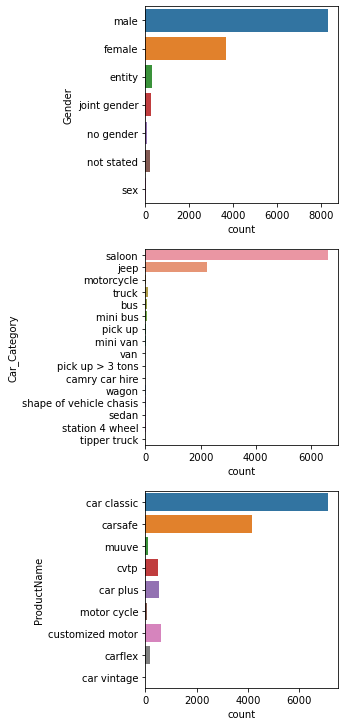

In [30]:
# make plots of the categorical columns
plt.figure(figsize=(5,10))
for index, col in enumerate(['Gender', 'Car_Category', 'ProductName']):
    plt.subplot(3, 1, index+1)
    plt.tight_layout()
    sns.countplot(y = df[col],)

In [31]:
#number of observations & its ratio for State
pd.DataFrame([df['State'].value_counts(), df['State'].value_counts(normalize=True)],).T

State     State
lagos            3494.0  0.569334
benue             693.0  0.112922
abuja-municipal   257.0  0.041877
eti-osa           241.0  0.039270
ibeju-lekki       129.0  0.021020
...                 ...       ...
ekiti-west          1.0  0.000163
ughelli-north       1.0  0.000163
isoko-north         1.0  0.000163
awka-north          1.0  0.000163
aba-south           1.0  0.000163

[113 rows x 2 columns]

In [32]:
#number of observations & its ratio for LGA name
pd.DataFrame([df['LGA_Name'].value_counts(), df['LGA_Name'].value_counts(normalize=True)],).T

LGA_Name  LGA_Name
victoria island    1284.0  0.208814
ikeja               438.0  0.071231
surulere            306.0  0.049764
abuja municipal     257.0  0.041795
lagos mainland      245.0  0.039844
...                   ...       ...
ekeremor              1.0  0.000163
vgc                   1.0  0.000163
awoyaya               1.0  0.000163
ughelli north         1.0  0.000163
ifako-agege           1.0  0.000163

[270 rows x 2 columns]

In [33]:
#number of observations & its ratio for subject car color
pd.DataFrame([df['Subject_Car_Colour'].value_counts(), df['Subject_Car_Colour'].value_counts(normalize=True)],).T

Subject_Car_Colour  Subject_Car_Colour
black                       2057.0            0.365884
silver                       605.0            0.107613
grey                         565.0            0.100498
as attached                  555.0            0.098719
blue                         398.0            0.070793
white                        321.0            0.057097
red                          274.0            0.048737
green                        259.0            0.046069
gold                         192.0            0.034152
ash                          142.0            0.025258
wine                         101.0            0.017965
brown                         65.0            0.011562
cream                         10.0            0.001779
yellow                         8.0            0.001423
dark gray                      7.0            0.001245
white & blue                   5.0            0.000889
orange                         5.0            0.000889
purple                         4.0            0.000711
b.silver                       4.0            0.000711
red & white                    4.0            0.000711
dark grey                      3.0            0.000534
blue & red                     3.0            0.000534
d. red                         3.0            0.000534
light green                    3.0            0.000534
gray & gray                    2.0            0.000356
dark blue                      2.0            0.000356
red & black                    2.0            0.000356
white & red                    2.0            0.000356
black & white                  2.0            0.000356
black & orange                 2.0            0.000356
gray & silver                  2.0            0.000356
red & blue                     1.0            0.000178
blue&white&red                 1.0            0.000178
blue sky                       1.0            0.000178
dark red                       1.0            0.000178
white & yellow                 1.0            0.000178
dark green                     1.0            0.000178
champagne                      1.0            0.000178
beige mitalic                  1.0            0.000178
d. gold                        1.0            0.000178
burgundy                       1.0            0.000178
yellow & white                 1.0            0.000178
red & yellow                   1.0            0.000178
light blue                     1.0            0.000178
light gray                     1.0            0.000178
red maroon                     1.0            0.000178

In [34]:
#number of observations & its ratio for subject car make
pd.DataFrame([df['Subject_Car_Make'].value_counts(), df['Subject_Car_Make'].value_counts(normalize=True)],).T

Subject_Car_Make  Subject_Car_Make
toyota                   5466.0          0.517761
honda                    1146.0          0.108554
lexus                     654.0          0.061949
mercedes                  577.0          0.054656
hyundai                   512.0          0.048499
...                         ...               ...
changan                     1.0          0.000095
lincoln                     1.0          0.000095
commander                   1.0          0.000095
ashok leyland               1.0          0.000095
brilliance                  1.0          0.000095

[75 rows x 2 columns]

In [35]:
#number of observations & its ratio for for Target
pd.DataFrame([df['target'].value_counts(), df['target'].value_counts(normalize=True)]).T

target    target
0.0  10624.0  0.879543
1.0   1455.0  0.120457

<AxesSubplot:title={'center':'TARGET'}>

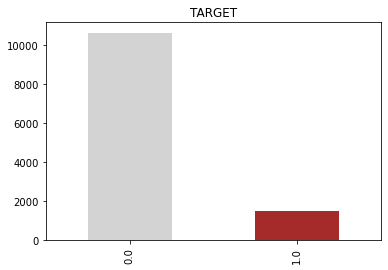

In [36]:
df['target'].value_counts().plot(kind='bar', color=['lightgrey', 'brown'], title='TARGET')

# reducing the number of categories

In [37]:
# reducing the number of categorical columns
print(df['Gender'].value_counts(normalize=True))
print(df['Gender'].unique())

male            0.648707
female          0.285614
entity          0.023290
joint gender    0.018477
not stated      0.014750
no gender       0.005900
sex             0.003261
Name: Gender, dtype: float64
['male' 'female' 'entity' 'joint gender' nan 'no gender' 'not stated'
 'sex']


In [38]:
df['Gender']= np.where(
      df['Gender'].isin(['entity', 'joint gender','no gender', 'not stated','sex']),
      'Other', df['Gender'])

In [39]:
print(df['Gender'].unique())

['male' 'female' 'Other' nan]


In [40]:
df['Car_Category'].value_counts(normalize=True)

saloon                     0.723258
jeep                       0.242395
truck                      0.011776
bus                        0.006106
mini bus                   0.004907
pick up                    0.003489
motorcycle                 0.001963
sedan                      0.001527
mini van                   0.001418
wagon                      0.001090
shape of vehicle chasis    0.000654
station 4 wheel            0.000654
van                        0.000327
pick up > 3 tons           0.000218
tipper truck               0.000109
camry car hire             0.000109
Name: Car_Category, dtype: float64

In [41]:
df['Car_Category'].unique()

array(['saloon', 'jeep', nan, 'motorcycle', 'truck', 'bus', 'mini bus',
       'pick up', 'mini van', 'van', 'pick up > 3 tons', 'camry car hire',
       'wagon', 'shape of vehicle chasis', 'sedan', 'station 4 wheel',
       'tipper truck'], dtype=object)

In [42]:
df['Car_Category']= np.where(df['Car_Category'].isin(['saloon', 'sedan', 'motorcycle']), 
                             'small vehicles', df['Car_Category'])

df['Car_Category']= np.where(df['Car_Category'].isin(['jeep','truck', 'pick up > 3 tons','bus', 
                                                       'wagon', 'pick up', 
                                                       'van', 'camry car hire', 'tipper truck',
                                                      'shape of vehicle chasis', 'station 4 wheel',
                                                     'mini van', 'mini bus',]),
                             'SUV, heavy vehicles & Others', df['Car_Category'])


In [43]:
df['Car_Category'].unique()

array(['small vehicles', 'SUV, heavy vehicles & Others', nan],
      dtype=object)

<AxesSubplot:>

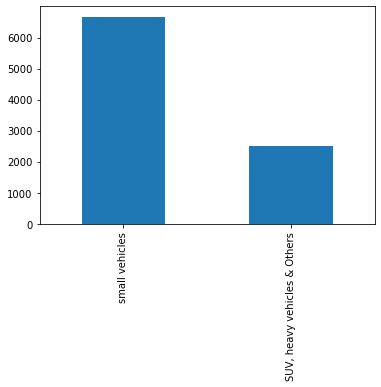

In [44]:
df['Car_Category'].value_counts().plot(kind='bar')

In [45]:
df['ProductName'].value_counts()

car classic         7142
carsafe             4154
customized motor     605
car plus             523
cvtp                 509
carflex              194
muuve                100
motor cycle           49
car vintage            5
Name: ProductName, dtype: int64

In [46]:
df['ProductName'] = np.where(df['ProductName']\
                             .isin(['customized motor', 'motor cycle', 'car vintage']), 'Error', df['ProductName'])
df['ProductName']=\
np.where(df['ProductName'].isin(['muuve', 'cvtp', 'car plus', 'carflex']), 'Other Products', df['ProductName'])

In [47]:
df['ProductName'].value_counts(normalize=True)

car classic       0.537761
carsafe           0.312778
Other Products    0.099842
Error             0.049620
Name: ProductName, dtype: float64

<AxesSubplot:xlabel='count', ylabel='ProductName'>

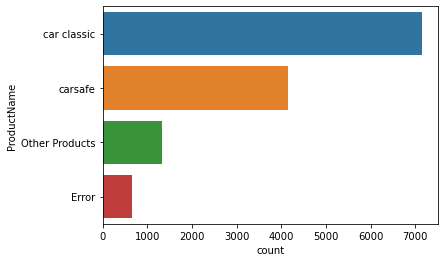

In [48]:
sns.countplot(y=df['ProductName'])

In [49]:
df.head()

Gender  Age  No_Pol                  Car_Category Subject_Car_Colour  \
0    male   30       1                small vehicles              black   
1  female   79       1  SUV, heavy vehicles & Others               grey   
2    male   43       1                small vehicles                red   
3    male    2       1                           NaN                NaN   
4   Other   20       3                           NaN                NaN   

  Subject_Car_Make LGA_Name  State     ProductName  target  ...  \
0           toyota      NaN    NaN     car classic     0.0  ...   
1           toyota      NaN    NaN     car classic     1.0  ...   
2           toyota      NaN    NaN     car classic     0.0  ...   
3              NaN      NaN    NaN         carsafe     0.0  ...   
4              NaN    lagos  lagos  Other Products     1.0  ...   

   Policy End Date_is month start  Policy End Date_is month end  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             1   

   First Transaction Date_year  First Transaction Date_month  \
0                         2010                             5   
1                         2010                            11   
2                         2010                             3   
3                         2010                             8   
4                         2010                             8   

   First Transaction Date_quarter  First Transaction Date_day of week  \
0                               2                                   4   
1                               4                                   0   
2                               1                                   6   
3                               3                                   5   
4                               3                                   6   

   First Transaction Date_is weekend  First Transaction Date_days in month  \
0                                  1                                    31   
1                                  0                                    30   
2                                  1                                    31   
3                                  1                                    31   
4                                  1                                    31   

   First Transaction Date_is month start  First Transaction Date_is month end  
0                                      0                                    0  
1                                      0                                    0  
2                                      0                                    0  
3                                      0                                    0  
4                                      0                                    0  

[5 rows x 34 columns]

In [50]:
for col in list(df.select_dtypes(['object'])):
    print(col, '-> ', df[col].nunique())

Gender ->  3
Car_Category ->  2
Subject_Car_Colour ->  46
Subject_Car_Make ->  75
LGA_Name ->  270
State ->  113
ProductName ->  4


In [51]:
df['Subject_Car_Colour'].value_counts(normalize=True)

black             0.365884
silver            0.107613
grey              0.100498
as attached       0.098719
blue              0.070793
white             0.057097
red               0.048737
green             0.046069
gold              0.034152
ash               0.025258
wine              0.017965
brown             0.011562
cream             0.001779
yellow            0.001423
dark gray         0.001245
white & blue      0.000889
orange            0.000889
purple            0.000711
b.silver          0.000711
red & white       0.000711
dark grey         0.000534
blue & red        0.000534
d. red            0.000534
light green       0.000534
gray & gray       0.000356
dark blue         0.000356
red & black       0.000356
white & red       0.000356
black & white     0.000356
black & orange    0.000356
gray & silver     0.000356
red & blue        0.000178
blue&white&red    0.000178
blue sky          0.000178
dark red          0.000178
white & yellow    0.000178
dark green        0.000178
c

In [52]:
df["Subject_Car_Colour"]= np.where(df['Subject_Car_Colour'].isin(['black', 'silver', 'grey', 'as attached', 'blue', 'white', 'red',
       'green', 'gold', 'ash', 'wine']), df["Subject_Car_Colour"], 'Other colors')

<AxesSubplot:>

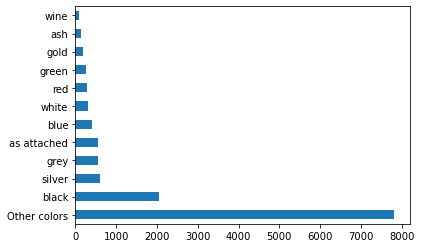

In [53]:
df['Subject_Car_Colour'].value_counts().plot(kind='barh')

In [54]:
df['Subject_Car_Colour'].value_counts()

Other colors    7812
black           2057
silver           605
grey             565
as attached      555
blue             398
white            321
red              274
green            259
gold             192
ash              142
wine             101
Name: Subject_Car_Colour, dtype: int64

In [55]:
lists = [5466, 1146,  654,  577,  512,  375,  307,  275,  133,  129,  121,
        102,   69,   68,   66,   47,   47,   47,   43,   35,   33,   30,
         29,   26,   21]
len(lists)

25

In [56]:
pd.Series(df['Subject_Car_Make'].value_counts()).index[:16]

Index(['toyota', 'honda', 'lexus', 'mercedes', 'hyundai', 'kia', 'ford',
       'nissan', 'volkswagen', 'iveco', 'range rover', 'mitsubishi', 'acura',
       'bmw', 'land rover', 'peugeot'],
      dtype='object')

In [57]:
lists2= ['toyota', 'other car make', 'honda', 'lexus', 'mercedes', 'hyundai',
       'kia', 'ford', 'nissan', 'volkswagen', 'iveco', 'range rover',
       'mitsubishi', 'acura', 'bmw', 'land rover']
len(lists2)

16

In [58]:
df['Subject_Car_Make']= np.where(df['Subject_Car_Make'].isin(lists2), df['Subject_Car_Make'], 'other car make')

In [59]:
df['Subject_Car_Make'].value_counts()

toyota            5466
other car make    3281
honda             1146
lexus              654
mercedes           577
hyundai            512
kia                375
ford               307
nissan             275
volkswagen         133
iveco              129
range rover        121
mitsubishi         102
acura               69
bmw                 68
land rover          66
Name: Subject_Car_Make, dtype: int64

In [60]:
df['LGA_Name'].value_counts(normalize=True).round(3).values

array([0.209, 0.071, 0.05 , 0.042, 0.04 , 0.04 , 0.039, 0.037, 0.029,
       0.021, 0.015, 0.015, 0.014, 0.012, 0.012, 0.011, 0.011, 0.01 ,
       0.01 , 0.009, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007,
       0.007, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001,

In [61]:
l1= [0.209, 0.071, 0.05 , 0.042, 0.04 , 0.04 , 0.039, 0.037, 0.029,
       0.021, 0.015, 0.015, 0.014, 0.012, 0.012, 0.011, 0.011]
len(l1)

17

In [62]:
df['LGA_Name'].value_counts(normalize=True).index[:17]

Index(['victoria island', 'ikeja', 'surulere', 'abuja municipal',
       'lagos mainland', 'lagos island', 'eti-osa', 'lekki', 'lagos',
       'ibeju/lekki', 'obia/akpor', 'oshodi-isolo', 'kosofe', 'abuja',
       'alimosho', 'apapa', 'benin'],
      dtype='object')

In [63]:
l0=['victoria island', 'ikeja', 'surulere', 'abuja municipal',
       'lagos mainland', 'lagos island', 'eti-osa', 'lekki', 'lagos',
       'ibeju/lekki',]

df['LGA_Name']= np.where(df['LGA_Name'].isin(l0), df['LGA_Name'], 'Other cities')

In [64]:
df['LGA_Name'].value_counts()

Other cities       9728
victoria island    1284
ikeja               438
surulere            306
abuja municipal     257
lagos mainland      245
lagos island        243
eti-osa             241
lekki               230
lagos               180
ibeju/lekki         129
Name: LGA_Name, dtype: int64

In [65]:
df['State'].value_counts().index[:10]

Index(['lagos', 'benue', 'abuja-municipal', 'eti-osa', 'ibeju-lekki', 'ogun',
       'obia-akpor', 'oshodi-isolo', 'delta', 'abuja'],
      dtype='object')

In [66]:
l3=[3494,  693,  257,  241,  129,   96,   95,   94,   91,   81]
len(l3)
l31= ['lagos', 'benue', 'abuja-municipal', 'eti-osa', 'ibeju-lekki', 'ogun',
       'obia-akpor', 'oshodi-isolo', 'delta', 'abuja']

In [67]:
df['State']= np.where(df['State'].isin(l31), df['State'], 'other state')

In [68]:
df['State'].value_counts()

other state        8010
lagos              3494
benue               693
abuja-municipal     257
eti-osa             241
ibeju-lekki         129
ogun                 96
obia-akpor           95
oshodi-isolo         94
delta                91
abuja                81
Name: State, dtype: int64

# reduced counts of categorical observation

In [69]:
for col in list(df.select_dtypes(['object'])):
    print(col, '-> ', df[col].nunique())

Gender ->  3
Car_Category ->  2
Subject_Car_Colour ->  12
Subject_Car_Make ->  16
LGA_Name ->  11
State ->  11
ProductName ->  4


In [70]:
# viewing the numeric columns of the data
df.select_dtypes(['float', 'int'])

Age  No_Pol  target  Policy Start Date_year  Policy Start Date_month  \
0      30       1     0.0                    2010                        5   
1      79       1     1.0                    2010                       11   
2      43       1     0.0                    2010                        3   
3       2       1     0.0                    2010                        8   
4      20       3     1.0                    2010                        8   
...   ...     ...     ...                     ...                      ...   
1197   67       2     NaN                    2010                       12   
1198   43       1     NaN                    2010                        1   
1199   30       1     NaN                    2010                        7   
1200   44       2     NaN                    2010                        2   
1201   28       1     NaN                    2010                        3   

      Policy Start Date_quarter  Policy Start Date_day of week  \
0                             2                              4   
1                             4                              0   
2                             1                              6   
3                             3                              5   
4                             3                              6   
...                         ...                            ...   
1197                          4                              6   
1198                          1                              3   
1199                          3                              0   
1200                          1                              1   
1201                          1                              3   

      Policy Start Date_is weekend  Policy Start Date_days in month  \
0                                1                               31   
1                                0                               30   
2                                1                               31   
3                                1                               31   
4                                1                               31   
...                            ...                              ...   
1197                             1                               31   
1198                             0                               31   
1199                             0                               31   
1200                             0                               28   
1201                             0                               31   

      Policy Start Date_is month start  ...  Policy End Date_is month start  \
0                                    0  ...                               0   
1                                    0  ...                               0   
2                                    0  ...                               0   
3                                    0  ...                               0   
4                                    0  ...                               0   
...                                ...  ...                             ...   
1197                                 0  ...                               0   
1198                                 0  ...                               0   
1199                                 0  ...                               0   
1200                                 0  ...                               0   
1201                                 0  ...                               0   

      Policy End Date_is month end  First Transaction Date_year  \
0                                0                         2010   
1                                0                         2010   
2                                0                         2010   
3                                0                         2010   
4                                1                         2010   
...                            ...                          ...   
1197 

In [71]:
# cleaning the age variable

<AxesSubplot:>

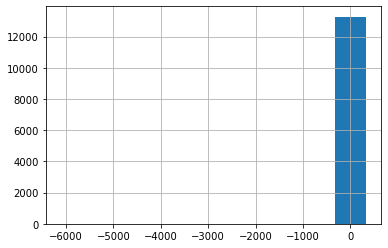

In [72]:
df['Age'].hist()

In [73]:
df['Age'].describe([0.05,.1,.15, .25, .5, .65,.75, .9, .95])

count    13281.000000
mean        42.375574
std         93.170951
min      -6099.000000
5%          20.000000
10%         28.000000
15%         31.000000
25%         35.000000
50%         41.000000
65%         45.000000
75%         50.000000
90%         62.000000
95%         73.000000
max        320.000000
Name: Age, dtype: float64

In [74]:
meanAge= df['Age'].mean()
stdAge = df['Age'].std()

print(meanAge)
print(stdAge)

42.37557412845418
93.17095095643782


In [75]:
df['Age']= np.where(df['Age'].between(15, 90), df['Age'], np.nan)

<AxesSubplot:>

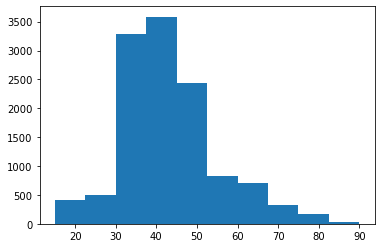

In [76]:
df['Age'].hist(grid=False)

In [77]:
# reducing the 'No. pol' variables

<AxesSubplot:>

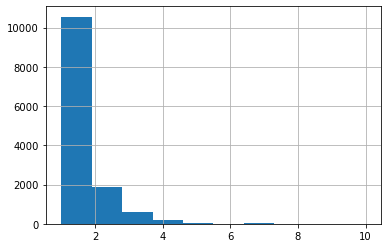

In [78]:
df['No_Pol'].hist()

In [79]:
df['No_Pol']= df['No_Pol'].astype(str)

In [80]:
df['No_Pol'].value_counts()

1     10552
2      1864
3       590
4       214
5        25
7        19
10        9
6         8
Name: No_Pol, dtype: int64

In [81]:
df['No_Pol'].unique()

array(['1', '3', '2', '4', '5', '7', '10', '6'], dtype=object)

In [82]:
df['No_Pol']= np.where(df['No_Pol'].isin(['3', '4', '5', '7', '10', '6']), '3+', 
                       df['No_Pol'])

In [83]:
df['No_Pol'].value_counts()

1     10552
2      1864
3+      865
Name: No_Pol, dtype: int64

<AxesSubplot:xlabel='count', ylabel='No_Pol'>

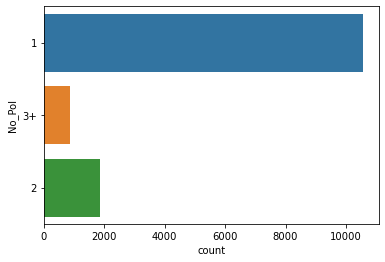

In [84]:
sns.countplot(y=df['No_Pol'])

In [85]:
df.head()

Gender   Age No_Pol                  Car_Category Subject_Car_Colour  \
0    male  30.0      1                small vehicles              black   
1  female  79.0      1  SUV, heavy vehicles & Others               grey   
2    male  43.0      1                small vehicles                red   
3    male   NaN      1                           NaN       Other colors   
4   Other  20.0     3+                           NaN       Other colors   

  Subject_Car_Make      LGA_Name        State     ProductName  target  ...  \
0           toyota  Other cities  other state     car classic     0.0  ...   
1           toyota  Other cities  other state     car classic     1.0  ...   
2           toyota  Other cities  other state     car classic     0.0  ...   
3   other car make  Other cities  other state         carsafe     0.0  ...   
4   other car make         lagos        lagos  Other Products     1.0  ...   

   Policy End Date_is month start  Policy End Date_is month end  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             1   

   First Transaction Date_year  First Transaction Date_month  \
0                         2010                             5   
1                         2010                            11   
2                         2010                             3   
3                         2010                             8   
4                         2010                             8   

   First Transaction Date_quarter  First Transaction Date_day of week  \
0                               2                                   4   
1                               4                                   0   
2                               1                                   6   
3                               3                                   5   
4                               3                                   6   

   First Transaction Date_is weekend  First Transaction Date_days in month  \
0                                  1                                    31   
1                                  0                                    30   
2                                  1                                    31   
3                                  1                                    31   
4                                  1                                    31   

   First Transaction Date_is month start  First Transaction Date_is month end  
0                                      0                                    0  
1                                      0                                    0  
2                                      0                                    0  
3                                      0                                    0  
4                                      0                                    0  

[5 rows x 34 columns]

# MissingValues Handling

In [86]:
df.isna().sum()/df.shape[0]

Gender                                   0.030118
Age                                      0.077931
No_Pol                                   0.000000
Car_Category                             0.309465
Subject_Car_Colour                       0.000000
Subject_Car_Make                         0.000000
LGA_Name                                 0.000000
State                                    0.000000
ProductName                              0.000000
target                                   0.090505
Policy Start Date_year                   0.000000
Policy Start Date_month                  0.000000
Policy Start Date_quarter                0.000000
Policy Start Date_day of week            0.000000
Policy Start Date_is weekend             0.000000
Policy Start Date_days in month          0.000000
Policy Start Date_is month start         0.000000
Policy Start Date_is month end           0.000000
Policy End Date_year                     0.000000
Policy End Date_month                    0.000000


In [87]:
df.isna().sum()

Gender                                    400
Age                                      1035
No_Pol                                      0
Car_Category                             4110
Subject_Car_Colour                          0
Subject_Car_Make                            0
LGA_Name                                    0
State                                       0
ProductName                                 0
target                                   1202
Policy Start Date_year                      0
Policy Start Date_month                     0
Policy Start Date_quarter                   0
Policy Start Date_day of week               0
Policy Start Date_is weekend                0
Policy Start Date_days in month             0
Policy Start Date_is month start            0
Policy Start Date_is month end              0
Policy End Date_year                        0
Policy End Date_month                       0
Policy End Date_quarter                     0
Policy End Date_day of week       

In [88]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [89]:
# handle the missing values .
knn_imputer= KNNImputer(missing_values=np.NaN, n_neighbors=10, metric='nan_euclidean', weights='distance')
df[['Age', 'Policy Start Date_year']] = knn_imputer.fit_transform(df[['Age', 'Policy Start Date_year']])

In [90]:
df

Gender   Age No_Pol                  Car_Category Subject_Car_Colour  \
0       male  30.0      1                small vehicles              black   
1     female  79.0      1  SUV, heavy vehicles & Others               grey   
2       male  43.0      1                small vehicles                red   
3       male  40.0      1                           NaN       Other colors   
4      Other  20.0     3+                           NaN       Other colors   
...      ...   ...    ...                           ...                ...   
1197    male  67.0      2  SUV, heavy vehicles & Others              black   
1198    male  43.0      1                small vehicles             silver   
1199    male  30.0      1  SUV, heavy vehicles & Others              white   
1200    male  44.0      2                small vehicles       Other colors   
1201    male  28.0      1                small vehicles             silver   

     Subject_Car_Make         LGA_Name        State     ProductName  target  \
0              toyota     Other cities  other state     car classic     0.0   
1              toyota     Other cities  other state     car classic     1.0   
2              toyota     Other cities  other state     car classic     0.0   
3      other car make     Other cities  other state         carsafe     0.0   
4      other car make            lagos        lagos  Other Products     1.0   
...               ...              ...          ...             ...     ...   
1197           toyota  victoria island        lagos     car classic     NaN   
1198          hyundai         surulere        lagos     car classic     NaN   
1199            iveco  victoria island        lagos  Other Products     NaN   
1200           nissan     Other cities  other state     car classic     NaN   
1201           toyota     Other cities  other state     car classic     NaN   

      ...  Policy End Date_is month start  Policy End Date_is month end  \
0     ...                               0                             0   
1     ...                               0                             0   
2     ...                               0                             0   
3     ...                               0                             0   
4     ...                               0                             1   
...   ...                             ...                           ...   
1197  ...                               0                             0   
1198  ...                               0                             0   
1199  ...                               0                             0   
1200  ...                               0                             0   
1201  ...                               0                             0   

      First Transaction Date_year  First Transaction Date_month  \
0                            2010                             5   
1                            2010                            11   
2                            2010                             3   
3                            2010                             8   
4                            2010                             8   
...                           ...                           ...   
1197                         2010                            12   
1198                         2010                             1   
1199                         2010                             7   
1200                         2010                             2   
1201                         2010                             3   

      First Transaction Date_quarter  First Transaction Date_day of week  \
0                                  2                                   4   
1                                  4                                   0   
2                                  1                                   6   
3                                  3                                   5   
4                                 

In [91]:
df['Gender'].value_counts(dropna=False, normalize=True)

male      0.629169
female    0.277012
Other     0.063700
NaN       0.030118
Name: Gender, dtype: float64

In [92]:
# check if there is any reduction in the data set.
assert all_data.shape[0] == df.shape[0]

In [93]:
# handling the missing values of the categorical columns
df['Car_Category'].replace({np.nan: 'Not Provided'}, inplace=True)

In [94]:
df.isnull().sum()

Gender                                    400
Age                                         0
No_Pol                                      0
Car_Category                                0
Subject_Car_Colour                          0
Subject_Car_Make                            0
LGA_Name                                    0
State                                       0
ProductName                                 0
target                                   1202
Policy Start Date_year                      0
Policy Start Date_month                     0
Policy Start Date_quarter                   0
Policy Start Date_day of week               0
Policy Start Date_is weekend                0
Policy Start Date_days in month             0
Policy Start Date_is month start            0
Policy Start Date_is month end              0
Policy End Date_year                        0
Policy End Date_month                       0
Policy End Date_quarter                     0
Policy End Date_day of week       

In [95]:
df.head()

Gender   Age No_Pol                  Car_Category Subject_Car_Colour  \
0    male  30.0      1                small vehicles              black   
1  female  79.0      1  SUV, heavy vehicles & Others               grey   
2    male  43.0      1                small vehicles                red   
3    male  40.0      1                  Not Provided       Other colors   
4   Other  20.0     3+                  Not Provided       Other colors   

  Subject_Car_Make      LGA_Name        State     ProductName  target  ...  \
0           toyota  Other cities  other state     car classic     0.0  ...   
1           toyota  Other cities  other state     car classic     1.0  ...   
2           toyota  Other cities  other state     car classic     0.0  ...   
3   other car make  Other cities  other state         carsafe     0.0  ...   
4   other car make         lagos        lagos  Other Products     1.0  ...   

   Policy End Date_is month start  Policy End Date_is month end  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             1   

   First Transaction Date_year  First Transaction Date_month  \
0                         2010                             5   
1                         2010                            11   
2                         2010                             3   
3                         2010                             8   
4                         2010                             8   

   First Transaction Date_quarter  First Transaction Date_day of week  \
0                               2                                   4   
1                               4                                   0   
2                               1                                   6   
3                               3                                   5   
4                               3                                   6   

   First Transaction Date_is weekend  First Transaction Date_days in month  \
0                                  1                                    31   
1                                  0                                    30   
2                                  1                                    31   
3                                  1                                    31   
4                                  1                                    31   

   First Transaction Date_is month start  First Transaction Date_is month end  
0                                      0                                    0  
1                                      0                                    0  
2                                      0                                    0  
3                                      0                                    0  
4                                      0                                    0  

[5 rows x 34 columns]

In [96]:
# misisng value imputation
simpleImpute = SimpleImputer(strategy='constant')
simpleImpute.fit(df)
df1 = simpleImpute.transform(df)

In [97]:
df1 = pd.DataFrame(df1, columns= list(df))

In [98]:
df1['target'].value_counts(dropna=False)

0.0              10624
1.0               1455
missing_value     1202
Name: target, dtype: int64

In [99]:
df1['Car_Category'].value_counts()

small vehicles                  6665
Not Provided                    4110
SUV, heavy vehicles & Others    2506
Name: Car_Category, dtype: int64

In [100]:
df1['Gender'].value_counts()

male             8356
female           3679
Other             846
missing_value     400
Name: Gender, dtype: int64

In [101]:
# final data with no missing values..
df1.isna().sum()

Gender                                   0
Age                                      0
No_Pol                                   0
Car_Category                             0
Subject_Car_Colour                       0
Subject_Car_Make                         0
LGA_Name                                 0
State                                    0
ProductName                              0
target                                   0
Policy Start Date_year                   0
Policy Start Date_month                  0
Policy Start Date_quarter                0
Policy Start Date_day of week            0
Policy Start Date_is weekend             0
Policy Start Date_days in month          0
Policy Start Date_is month start         0
Policy Start Date_is month end           0
Policy End Date_year                     0
Policy End Date_month                    0
Policy End Date_quarter                  0
Policy End Date_day of week              0
Policy End Date_is weekend               0
Policy End 

In [102]:
df1.dtypes

Gender                                   object
Age                                      object
No_Pol                                   object
Car_Category                             object
Subject_Car_Colour                       object
Subject_Car_Make                         object
LGA_Name                                 object
State                                    object
ProductName                              object
target                                   object
Policy Start Date_year                   object
Policy Start Date_month                  object
Policy Start Date_quarter                object
Policy Start Date_day of week            object
Policy Start Date_is weekend             object
Policy Start Date_days in month          object
Policy Start Date_is month start         object
Policy Start Date_is month end           object
Policy End Date_year                     object
Policy End Date_month                    object
Policy End Date_quarter                 

In [103]:
df1['Age']= df1['Age'].astype(float)

# data splitting and model fiting

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, auc, roc_auc_score

# tackle imbalance class 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# learners

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

svc=SVC()
tree= DecisionTreeClassifier()
light= LGBMClassifier()
forest=RandomForestClassifier()

ohe=OneHotEncoder()
sc =StandardScaler()
smote= SMOTE()
under= RandomOverSampler()
over= RandomOverSampler()

In [105]:
# split
training, testing= df1.iloc[:12079, :], df1.iloc[12079:, :].drop('target', axis=1)
training['target'] = training['target'].astype(int)
ls = list(training)
del ls[9]
X,y  = training[ls], training['target']

X_train, X_val, y_train, y_val= train_test_split(X,y, stratify=y, test_size=.03, random_state=100)

<ipython-input-105-1038d5ba6578>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['target'] = training['target'].astype(int)


In [106]:
print('Training size: ', X_train.shape)
print('Validation size: ', X_val.shape)

Training size:  (11716, 33)
Validation size:  (363, 33)


In [107]:
y_train

136      0
11651    0
6964     0
6267     0
7454     1
        ..
1537     0
1062     0
7176     0
6631     0
485      0
Name: target, Length: 11716, dtype: int64

In [108]:
cat = [  'Gender',
         'No_Pol',
         'Car_Category',
         'Subject_Car_Colour',
         'Subject_Car_Make',
         'LGA_Name',
         'State',
         'ProductName',
         'Policy Start Date_year',
         'Policy Start Date_month',
         'Policy Start Date_quarter',
         'Policy Start Date_day of week',
         'Policy Start Date_is weekend',
         'Policy Start Date_days in month',
         'Policy Start Date_is month start',
         'Policy Start Date_is month end',
         'Policy End Date_year',
         'Policy End Date_month',
         'Policy End Date_quarter',
         'Policy End Date_day of week',
         'Policy End Date_is weekend',
         'Policy End Date_days in month',
         'Policy End Date_is month start',
         'Policy End Date_is month end',
         'First Transaction Date_year',
         'First Transaction Date_month',
         'First Transaction Date_quarter',
         'First Transaction Date_day of week',
         'First Transaction Date_is weekend',
         'First Transaction Date_days in month',
         'First Transaction Date_is month start',
         'First Transaction Date_is month end']

num= ['Age']

col_transformer = ColumnTransformer([('ohe', ohe, cat),  ('scaler', sc, num)], remainder='passthrough')
model = Pipeline([('transformer', col_transformer), ('under', under), 
                  ('smote', smote), ('clf', RandomForestClassifier()) ])

In [109]:
clfs = [forest, tree, svc, light]
names= ['randomforest', 'decisiontree', 'svc', 'lgm']

F1_SCORES=[]
for clf, name in zip(clfs, names):
    col_transformer = ColumnTransformer([('ohe', ohe, cat),  
                                         ('scaler', sc, num)], 
                                        remainder='passthrough')
    pipe = Pipeline([('transformer', col_transformer), ('under', under), 
                  ('smote', smote), ('clf='+name, clf) ])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_val)
    scores = f1_score(y_val, pred)
    F1_SCORES.append(scores)

    
logs= pd.Series(F1_SCORES, index=names)   

In [110]:
logs

randomforest    0.389610
decisiontree    0.280000
svc             0.431373
lgm             0.457516
dtype: float64

# Tuning

In [131]:
# tuning LightGBM using bayesian method

import optuna
from optuna.samplers import TPESampler


def obj_fun(trial):
    
    num_leaves= trial.suggest_int('num_leaves', 2, 12)
    max_depth= trial.suggest_int('max_depth', 1, 40)
    learning_rate= trial.suggest_uniform('learning_rate', 0.001, 1)
    
    clf = LGBMClassifier(
                    boosting_type = 'gbdt',
                    num_leaves=num_leaves,
                    max_depth= max_depth,
                    learning_rate=learning_rate,
                    
                )



    cat = [  'Gender',
         'No_Pol',
         'Car_Category',
         'Subject_Car_Colour',
         'Subject_Car_Make',
         'LGA_Name',
         'State',
         'ProductName',
         'Policy Start Date_year',
         'Policy Start Date_month',
         'Policy Start Date_quarter',
         'Policy Start Date_day of week',
         'Policy Start Date_is weekend',
         'Policy Start Date_days in month',
         'Policy Start Date_is month start',
         'Policy Start Date_is month end',
         'Policy End Date_year',
         'Policy End Date_month',
         'Policy End Date_quarter',
         'Policy End Date_day of week',
         'Policy End Date_is weekend',
         'Policy End Date_days in month',
         'Policy End Date_is month start',
         'Policy End Date_is month end',
         'First Transaction Date_year',
         'First Transaction Date_month',
         'First Transaction Date_quarter',
         'First Transaction Date_day of week',
         'First Transaction Date_is weekend',
         'First Transaction Date_days in month',
         'First Transaction Date_is month start',
         'First Transaction Date_is month end']

    num= ['Age']

    ohe = OneHotEncoder()
    sc = StandardScaler()

    col_trans = ColumnTransformer([('encoder', ohe, cat), 
                                   ('scaler',sc, num)])

    pipe= Pipeline(steps=[('column_transformer', col_trans),  ('under', under), 
                          ('smote', smote),('clf', clf)])
    
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_val)
    f1score= f1_score(y_val, pred)
    
    return f1score


study= optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(obj_fun, n_trials=100)
best_trail = study.best_trial.value

[I 2021-10-26 10:47:10,149] A new study created in memory with name: no-name-f094f104-a15d-475a-9f65-dcc27492c42a
[I 2021-10-26 10:47:10,467] Trial 0 finished with value: 0.4145077720207254 and parameters: {'num_leaves': 4, 'max_depth': 11, 'learning_rate': 0.08364562980887534}. Best is trial 0 with value: 0.4145077720207254.
[I 2021-10-26 10:47:10,850] Trial 1 finished with value: 0.42105263157894735 and parameters: {'num_leaves': 10, 'max_depth': 38, 'learning_rate': 0.9705245982908708}. Best is trial 1 with value: 0.42105263157894735.
[I 2021-10-26 10:47:11,218] Trial 2 finished with value: 0.42162162162162165 and parameters: {'num_leaves': 7, 'max_depth': 7, 'learning_rate': 0.11366947528761376}. Best is trial 2 with value: 0.42162162162162165.
[I 2021-10-26 10:47:11,550] Trial 3 finished with value: 0.45454545454545453 and parameters: {'num_leaves': 3, 'max_depth': 32, 'learning_rate': 0.47673570925502595}. Best is trial 3 with value: 0.45454545454545453.
[I 2021-10-26 10:47:11,92

[I 2021-10-26 10:47:26,107] Trial 36 finished with value: 0.4895104895104894 and parameters: {'num_leaves': 10, 'max_depth': 23, 'learning_rate': 0.46094794968700326}. Best is trial 12 with value: 0.5170068027210885.
[I 2021-10-26 10:47:26,453] Trial 37 finished with value: 0.4900662251655629 and parameters: {'num_leaves': 5, 'max_depth': 5, 'learning_rate': 0.7537769718179763}. Best is trial 12 with value: 0.5170068027210885.
[I 2021-10-26 10:47:26,789] Trial 38 finished with value: 0.42391304347826086 and parameters: {'num_leaves': 7, 'max_depth': 1, 'learning_rate': 0.5710560949186838}. Best is trial 12 with value: 0.5170068027210885.
[I 2021-10-26 10:47:27,158] Trial 39 finished with value: 0.4755244755244755 and parameters: {'num_leaves': 11, 'max_depth': 8, 'learning_rate': 0.4997037856694031}. Best is trial 12 with value: 0.5170068027210885.
[I 2021-10-26 10:47:27,529] Trial 40 finished with value: 0.4927536231884059 and parameters: {'num_leaves': 8, 'max_depth': 22, 'learning_r

[I 2021-10-26 10:47:39,278] Trial 72 finished with value: 0.4539007092198582 and parameters: {'num_leaves': 8, 'max_depth': 28, 'learning_rate': 0.7804249458089606}. Best is trial 12 with value: 0.5170068027210885.
[I 2021-10-26 10:47:39,640] Trial 73 finished with value: 0.513888888888889 and parameters: {'num_leaves': 8, 'max_depth': 14, 'learning_rate': 0.6119890268819419}. Best is trial 12 with value: 0.5170068027210885.
[I 2021-10-26 10:47:39,998] Trial 74 finished with value: 0.45637583892617456 and parameters: {'num_leaves': 7, 'max_depth': 14, 'learning_rate': 0.6010780486875048}. Best is trial 12 with value: 0.5170068027210885.
[I 2021-10-26 10:47:40,369] Trial 75 finished with value: 0.5142857142857142 and parameters: {'num_leaves': 9, 'max_depth': 12, 'learning_rate': 0.6916674142583636}. Best is trial 12 with value: 0.5170068027210885.
[I 2021-10-26 10:47:40,731] Trial 76 finished with value: 0.4461538461538461 and parameters: {'num_leaves': 9, 'max_depth': 13, 'learning_ra

In [112]:
best_trail

0.5571428571428573

In [132]:
# rebuild the model using new hyper parameters
cat = [  'Gender',
         'No_Pol',
         'Car_Category',
         'Subject_Car_Colour',
         'Subject_Car_Make',
         'LGA_Name',
         'State',
         'ProductName',
         'Policy Start Date_year',
         'Policy Start Date_month',
         'Policy Start Date_quarter',
         'Policy Start Date_day of week',
         'Policy Start Date_is weekend',
         'Policy Start Date_days in month',
         'Policy Start Date_is month start',
         'Policy Start Date_is month end',
         'Policy End Date_year',
         'Policy End Date_month',
         'Policy End Date_quarter',
         'Policy End Date_day of week',
         'Policy End Date_is weekend',
         'Policy End Date_days in month',
         'Policy End Date_is month start',
         'Policy End Date_is month end',
         'First Transaction Date_year',
         'First Transaction Date_month',
         'First Transaction Date_quarter',
         'First Transaction Date_day of week',
         'First Transaction Date_is weekend',
         'First Transaction Date_days in month',
         'First Transaction Date_is month start',
         'First Transaction Date_is month end']

num= ['Age']

d = {}
for key, value in study.best_trial.params.items():
    d[key]=value
clf2 = LGBMClassifier(
                    boosting_type = 'gbdt',
                    num_leaves=list(d.values())[0],
                    max_depth= list(d.values())[1],
                    learning_rate=list(d.values())[2],
                    
                )
col_transformer = ColumnTransformer([('ohe', ohe, cat),  ('scaler', sc, num)], remainder='passthrough')
modeltuned = Pipeline([('transformer', col_transformer), ('under', under), 
                  ('smote', smote), ('clf', clf2) ])

modeltuned.fit(X_train, y_train);
fpred= modeltuned.predict(X_val)
prbpred =modeltuned.predict_proba(X_val)[:,[1]].ravel()

# Evaluation

In [135]:
# f evaluations
print(classification_report(y_val, fpred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       319
           1       0.34      0.75      0.46        44

    accuracy                           0.79       363
   macro avg       0.65      0.77      0.67       363
weighted avg       0.88      0.79      0.82       363



In [140]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_val, fpred, normalize='all'), columns=['pred-neg', 'pred-pos'], 
             index=['neg-class', 'pos-class'])

pred-neg  pred-pos
neg-class  0.699725  0.179063
pos-class  0.030303  0.090909

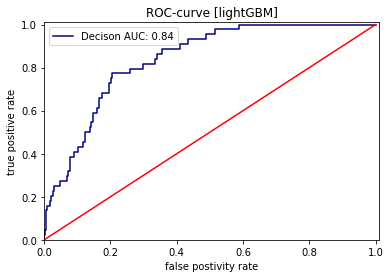

In [150]:
# ROC curve

fprdt, tprdt, _ = roc_curve(y_val, prbpred)
aucdt = np.round(roc_auc_score(y_val, prbpred), 3)

plt.title('ROC-curve [lightGBM]')
plt.plot(fprdt, tprdt, label="Decison AUC: "+str(np.round(aucdt,2)), color="navy")
plt.plot([0,1],[0,1],color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.xlabel("false postivity rate")
plt.ylabel("true positive rate")
plt.legend()

In [151]:
from joblib import dump
dump(modeltuned, 'output/tuned-lightgbm.pkl')

['output/tuned-lightgbm.pkl']